# Quantum Random Number Generator

In [16]:
"""
Generates a random number using quantum superposition and measurement.
    
Args:
num_bits (int): Number of random bits to generate.
    
Returns:
int: A random number between 0 and 2^num_bits - 1.
"""

'\nGenerates a random number using quantum superposition and measurement.\n    \nArgs:\nnum_bits (int): Number of random bits to generate.\n    \nReturns:\nint: A random number between 0 and 2^num_bits - 1.\n'

In [17]:
from qiskit_aer import Aer
from qiskit import QuantumCircuit
import numpy as np
from qiskit.primitives import Sampler
import matplotlib.pyplot as plt

In [18]:
def quantum_random_number_generator(num_bits=8):
    
    # Create a quantum circuit with `num_bits` qubits and classical bits
    qc = QuantumCircuit(num_bits, num_bits)
    
    # Step 1: Apply Hadamard gates to create superposition
    for qubit in range(num_bits):
        qc.h(qubit)  # Puts each qubit into |+⟩ state (50% |0⟩, 50% |1⟩)
    
    # Step 2: Measure all qubits
    qc.measure(range(num_bits), range(num_bits))
    
    # Step 3: Use the Sampler primitive to run the circuit
    sampler = Sampler()
    result = sampler.run(qc, shots=1).result()  # Run the circuit once
    
    # Step 4: Extract the random bitstring
    quasi_dist = result.quasi_dists[0]  # Get the quasi-probability distribution
    random_bitstring = bin(list(quasi_dist.keys())[0])[2:].zfill(num_bits)  # Convert to binary
    
    # Convert the bitstring to an integer
    random_number = int(random_bitstring, 2)
    
    return random_number, random_bitstring, qc


In [23]:
# Generate a random number
num_bits = 8  # Generate an 8-bit random number (0-255)
random_number, random_bitstring, qc = quantum_random_number_generator(num_bits)

C:\Users\acuad\AppData\Local\Temp\ipykernel_29264\2299072658.py:14: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


In [24]:
# Display results
print(f"Random Bitstring: {random_bitstring}")
print(f"Random Number: {random_number}")

Random Bitstring: 01101100
Random Number: 108


In [25]:
# Visualize the quantum circuit
print("\nQuantum Circuit:")
print(qc.draw(output='text'))



Quantum Circuit:
     ┌───┐┌─┐                     
q_0: ┤ H ├┤M├─────────────────────
     ├───┤└╥┘┌─┐                  
q_1: ┤ H ├─╫─┤M├──────────────────
     ├───┤ ║ └╥┘┌─┐               
q_2: ┤ H ├─╫──╫─┤M├───────────────
     ├───┤ ║  ║ └╥┘┌─┐            
q_3: ┤ H ├─╫──╫──╫─┤M├────────────
     ├───┤ ║  ║  ║ └╥┘┌─┐         
q_4: ┤ H ├─╫──╫──╫──╫─┤M├─────────
     ├───┤ ║  ║  ║  ║ └╥┘┌─┐      
q_5: ┤ H ├─╫──╫──╫──╫──╫─┤M├──────
     ├───┤ ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ┤ H ├─╫──╫──╫──╫──╫──╫─┤M├───
     ├───┤ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ┤ H ├─╫──╫──╫──╫──╫──╫──╫─┤M├
     └───┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/══════╩══╩══╩══╩══╩══╩══╩══╩═
           0  1  2  3  4  5  6  7 


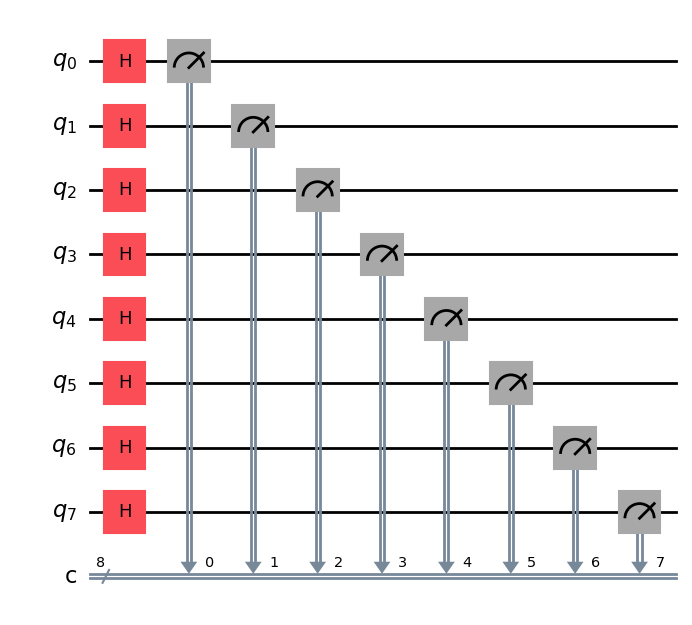

In [26]:
qc.draw(output='mpl')

C:\Users\acuad\AppData\Local\Temp\ipykernel_29264\1000380894.py:2: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


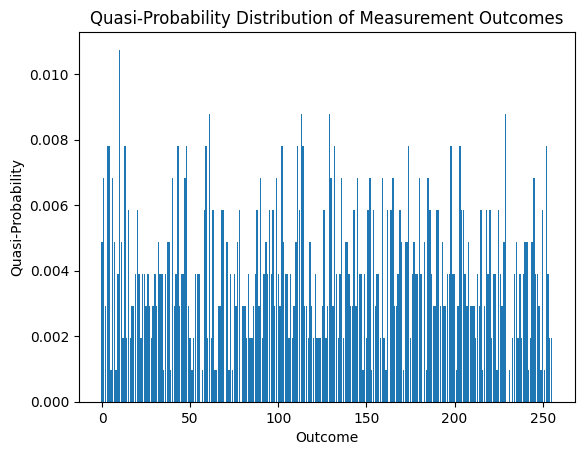

In [29]:
# Quasi-probability distribution
sampler = Sampler()
result = sampler.run(qc, shots=1024).result()
quasi_dist = result.quasi_dists[0]

plt.bar(quasi_dist.keys(), quasi_dist.values())
plt.xlabel("Outcome")
plt.ylabel("Quasi-Probability")
plt.title("Quasi-Probability Distribution of Measurement Outcomes")
plt.show()